In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import random
from flax.training import train_state

import pandas as pd
import matplotlib.pyplot as plt

# RELOADING MODULES
import importlib
import neural_net_jax
importlib.reload(neural_net_jax)
NeuralODE = neural_net_jax.NeuralODE

## `monthly`

In [3]:
t_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/t_train_m.csv'), dtype=jnp.float32)) # x is timepoints t
t_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/t_test_m.csv'), dtype=jnp.float32))

Y_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/Y_train_m.csv'))) 
Y_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/Y_test_m.csv'))) # y is the mean temperature

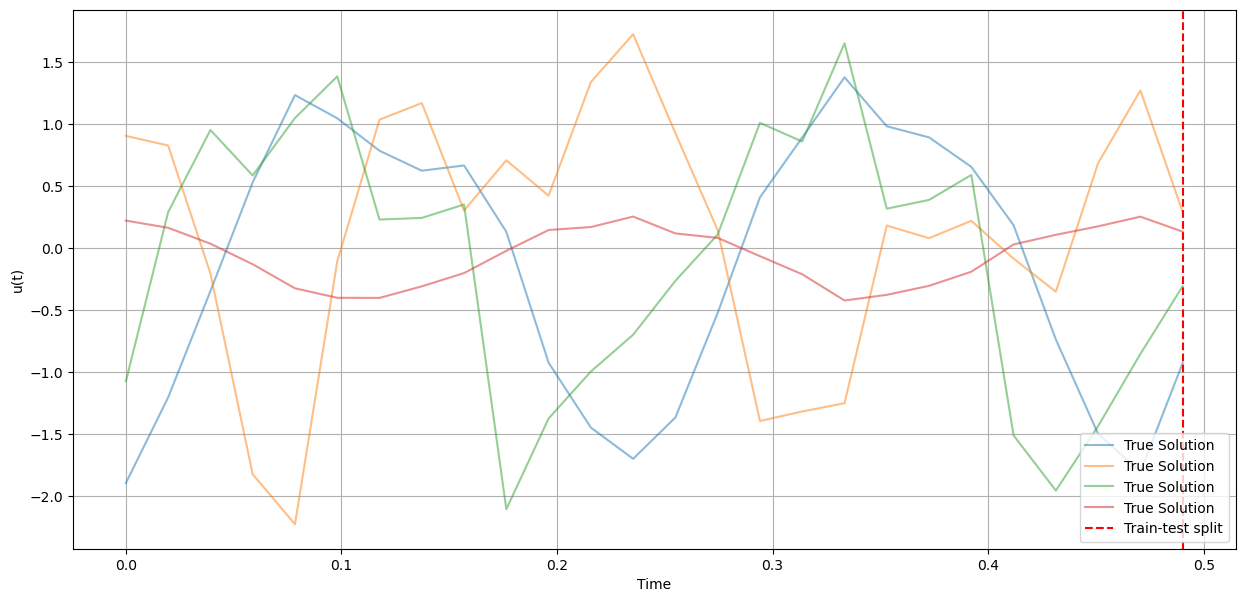

In [4]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train, Y_train, label='True Solution', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()

In [5]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

In [6]:
print(len(t_train))
n = int(len(t_train)/10)

26


In [7]:
y_train = Y_train[:,0]
x_train = Y_train[:,1:]
print(y_train.shape)
print(x_train.shape)

y_test = Y_test[:,0]
x_test = Y_test[:,1:]
print(y_test.shape)
print(x_test.shape)

(26,)
(26, 3)
(26,)
(26, 3)


#### `gradually increasing the training size`

In [8]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

k_list = [1, 2, 4, 6, 8]

for k in k_list:
    print(k)
    print(n*k/len(t_train))    
    state = model.train(state, t_train[:n*k], Y_train[:n*k], Y_train[0], loss = 0.1)

state = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)

1
0.07692307692307693
Epoch 100, Loss: 0.2372230738401413
Epoch 200, Loss: 0.2058769166469574
Epoch 300, Loss: 0.17971967160701752
Epoch 400, Loss: 0.15691056847572327
Epoch 500, Loss: 0.13684074580669403
Epoch 600, Loss: 0.11914527416229248
Epoch 700, Loss: 0.10354574769735336
2
0.15384615384615385
Epoch 100, Loss: 0.36215314269065857
Epoch 200, Loss: 0.24934150278568268
Epoch 300, Loss: 0.1931203454732895
Epoch 400, Loss: 0.1618976593017578
Epoch 500, Loss: 0.14368559420108795
Epoch 600, Loss: 0.13281024992465973
Epoch 700, Loss: 0.1262819766998291
Epoch 800, Loss: 0.12239913642406464
Epoch 900, Loss: 0.12013481557369232
Epoch 1000, Loss: 0.11884818226099014
Epoch 1100, Loss: 0.11813730001449585
Epoch 1200, Loss: 0.11775427311658859
Epoch 1300, Loss: 0.11755043268203735
Epoch 1400, Loss: 0.11744146049022675
Epoch 1500, Loss: 0.11738074570894241
Epoch 1600, Loss: 0.11734426021575928
Epoch 1700, Loss: 0.11731961369514465
Epoch 1800, Loss: 0.11729907989501953
Epoch 1900, Loss: 0.1172548

## `Training all at once`

In [33]:
"""rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

state = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)"""

'rng = random.PRNGKey(0)\nlearning_rate = 0.001\n\nlayer_widths = [5, 64, 32, 32, 4]\n\nmodel = NeuralODE(layer_widths, time_invariant=False)\nstate = model.create_train_state(rng, learning_rate, regularizer=0.1)\n\nstate = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)'

In [34]:
# (self, params, y0, t, state, args = None):
y_train_pred = model.neural_ode(state.params, Y_train[0], t_train, state)
y_test_pred = model.neural_ode(state.params, Y_train[0], t_test, state)

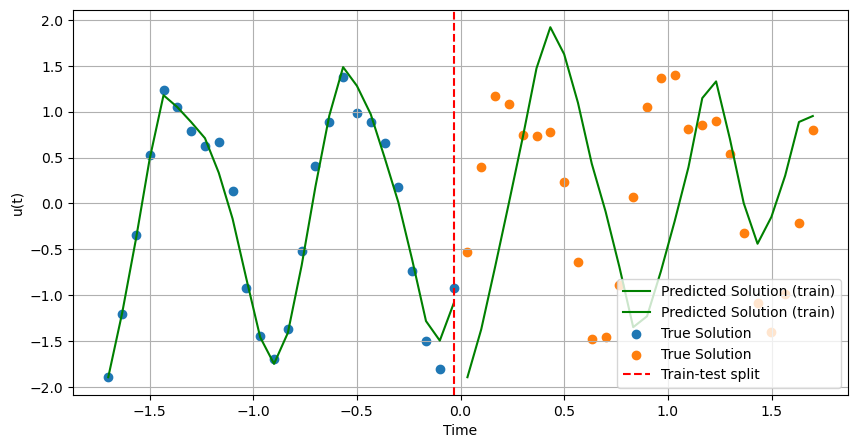

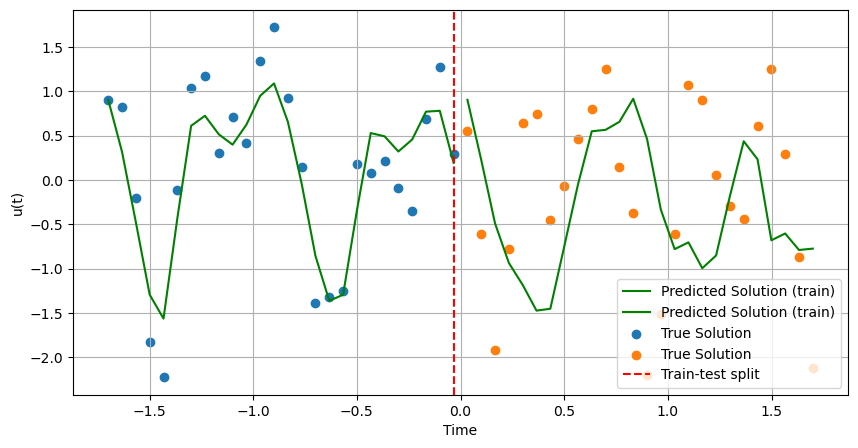

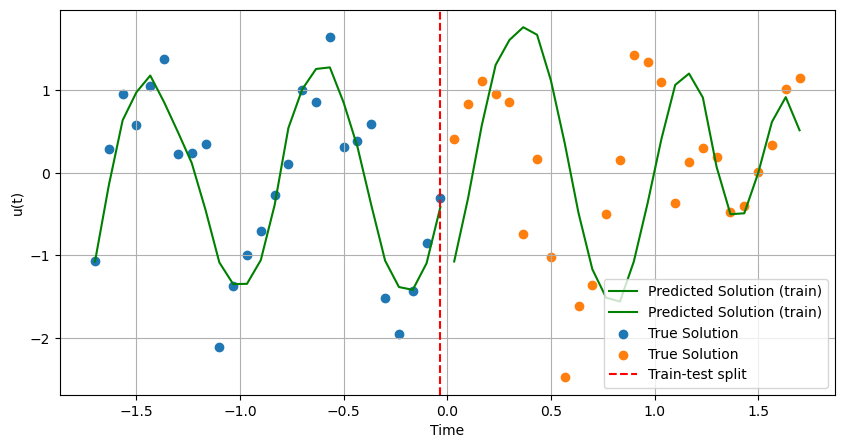

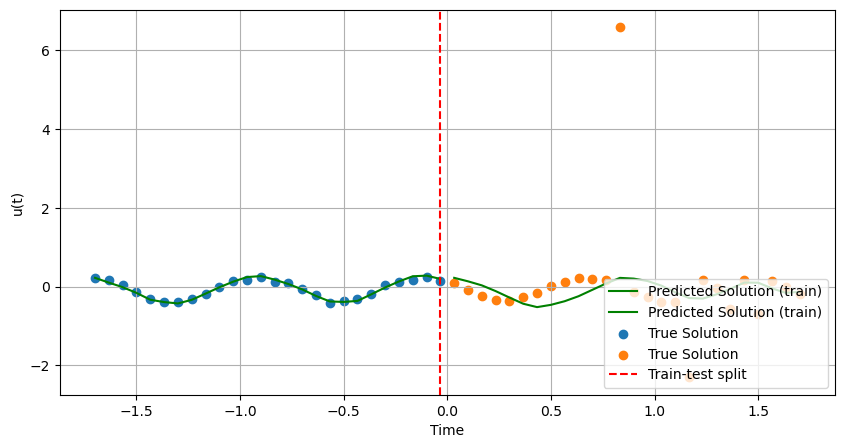

In [35]:
for i in range(4):
    #---------------------------PLOTTING RESULTS--------------------------#
    plt.figure(figsize=(10, 5))
    plt.plot(t_train, y_train_pred[:,i], 'g', label='Predicted Solution (train)')
    plt.plot(t_test, y_test_pred[:,i], 'g', label='Predicted Solution (train)')
    #plt.plot(t_test, y_test_pred, 'r', label='Predicted Solution (test)')
    plt.scatter(t_train, Y_train[:,i], label='True Solution', alpha = 1)
    plt.scatter(t_test, Y_test[:,i], label='True Solution', alpha = 1)

    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
    plt.legend(loc ="lower right")
    plt.grid(True)
    plt.show()

## `weekly`

In [36]:
t_train_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/t_train_w.csv'), dtype=jnp.float32)) # x is timepoints t
t_test_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/t_test_w.csv'), dtype=jnp.float32))

Y_train_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/Y_train_w.csv'))) 
Y_test_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/Y_test_w.csv'))) # y is the mean temperature

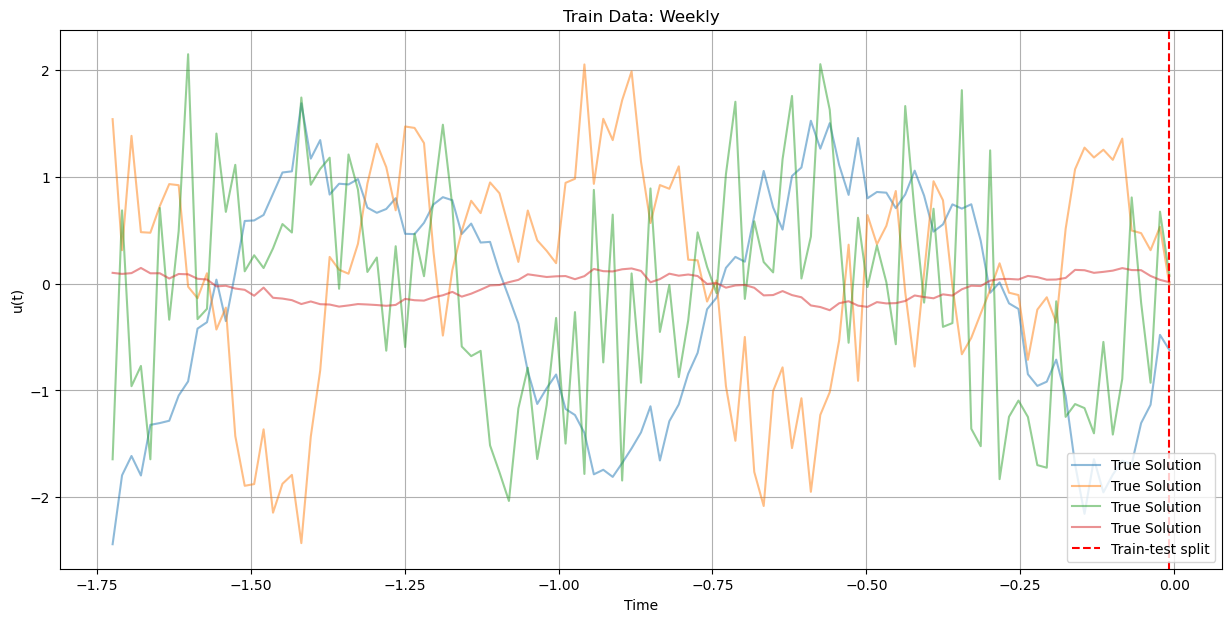

In [37]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train_w, Y_train_w, label='True Solution', alpha = 0.5)
#plt.plot(t_test_w, Y_test_w, label='True Solution', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train_w[-1], color='r', linestyle='--', label='Train-test split')
plt.title("Train Data: Weekly")
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()

In [43]:
y_train_w = np.atleast_2d(Y_train_w[:,0]).T
x_train_w = Y_train_w[:,1:]

y_test_w = np.atleast_2d(Y_test[:,0]).T
x_test_w = Y_test_w[:,1:]

In [42]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 1]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.01)

k_list = [1, 2, 4, 6, 8]

for k in k_list:
    print(k)
    print(n*k/len(t_train_w))    
    state = model.train(state, t_train_w[:n*k], y_train_w[:n*k], y_train_w[0], loss = 0.15, extra_args=x_train[:n*k])
    
state = model.train(state, t_train_w, y_train_w, y_train_w[0], loss = 0.15, extra_args=x_train[:n*k])

1
1.7699115044247788
Epoch 100, Loss: 1.3721057176589966
Epoch 200, Loss: 1.033772587776184
Epoch 300, Loss: 0.9087799191474915
Epoch 400, Loss: 0.8508255481719971
Epoch 500, Loss: 0.8017511963844299
Epoch 600, Loss: 0.7270892858505249
Epoch 700, Loss: 0.6676107048988342
Epoch 800, Loss: 0.6000527143478394
Epoch 900, Loss: 0.5314079523086548
Epoch 1000, Loss: 0.4672524333000183
Epoch 1100, Loss: 0.38569313287734985
Epoch 1200, Loss: 0.22739216685295105
2
3.5398230088495577
4
7.079646017699115
6
10.619469026548673
8
14.15929203539823


In [45]:
# (self, params, y0, t, state, args = None):
Y_train_pred_w = model.neural_ode(state.params, y_train_w[0], t_train_w, state, args=x_train_w)
Y_test_pred_w = model.neural_ode(state.params, y_train_w[-1], t_test_w, state, args=x_test_w)

*
*


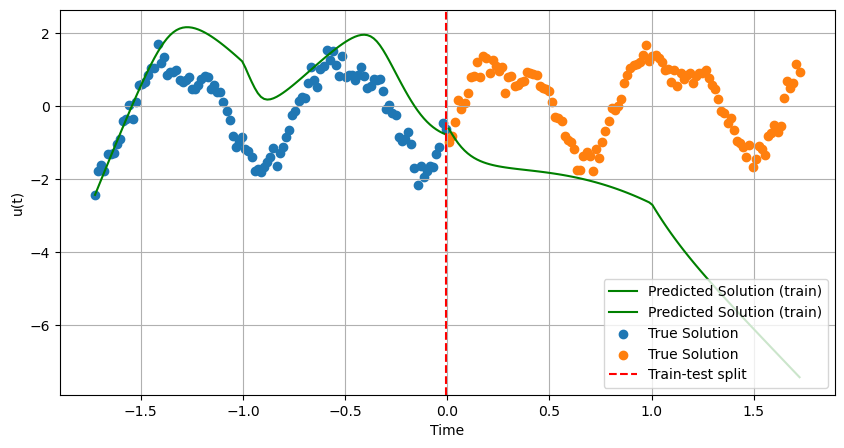

In [46]:
for i in range(1):
    #---------------------------PLOTTING RESULTS--------------------------#
    plt.figure(figsize=(10, 5))
    plt.plot(t_train_w, Y_train_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.plot(t_test_w, Y_test_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.scatter(t_train_w, Y_train_w[:,i], label='True Solution', alpha = 1)
    plt.scatter(t_test_w, Y_test_w[:,i], label='True Solution', alpha = 1)

    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.axvline(x=t_train_w[-1], color='r', linestyle='--', label='Train-test split')
    plt.legend(loc ="lower right")
    plt.grid(True)
    plt.show()

In [49]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.01)

k_list = [1, 2, 4, 6, 8]

for k in k_list:
    print(k)
    print(n*k/len(t_train_w))    
    state = model.train(state, t_train_w[:n*k], Y_train_w[:n*k], Y_train_w[0], loss = 0.2)
    
state = model.train(state, t_train_w, Y_train_w, Y_train_w[0], loss = 0.2)

1
1.7699115044247788
Epoch 100, Loss: 1.0998848676681519
Epoch 200, Loss: 0.89078688621521
Epoch 300, Loss: 0.7913512587547302
Epoch 400, Loss: 0.7524506449699402
Epoch 500, Loss: 0.7297492027282715
Epoch 600, Loss: 0.7121255993843079
Epoch 700, Loss: 0.7009245157241821
Epoch 800, Loss: 0.6895477175712585
Epoch 900, Loss: 0.6790099143981934
Epoch 1000, Loss: 0.614212691783905
Epoch 1100, Loss: 0.6013108491897583
Epoch 1200, Loss: 0.5158392786979675
Epoch 1300, Loss: 0.6760047078132629
Epoch 1400, Loss: 0.6227466464042664
Epoch 1500, Loss: 0.5741710066795349
Epoch 1600, Loss: 0.5541831254959106
Epoch 1700, Loss: 0.5336558818817139
Epoch 1800, Loss: 0.4921608865261078
Epoch 1900, Loss: 0.37420427799224854
Epoch 2000, Loss: 0.35788285732269287
Epoch 2100, Loss: 0.3504975438117981
Epoch 2200, Loss: 0.40641576051712036
Epoch 2300, Loss: 0.33573049306869507
Epoch 2400, Loss: 0.32824987173080444
Epoch 2500, Loss: 0.32579103112220764
Epoch 2600, Loss: 0.3198992908000946
Epoch 2700, Loss: 0.322

In [50]:
# (self, params, y0, t, state, args = None):
Y_train_pred_w = model.neural_ode(state.params, Y_train_w[0], t_train_w, state)
Y_test_pred_w = model.neural_ode(state.params, Y_train_w[-1], t_test_w, state)

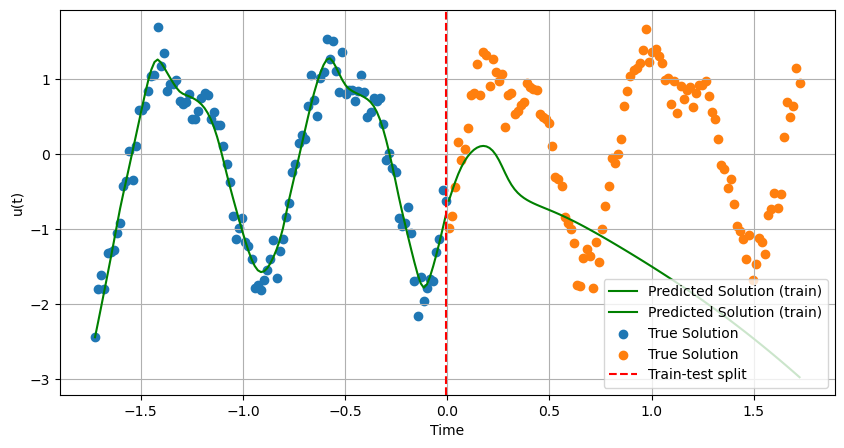

In [51]:
for i in range(1):
    #---------------------------PLOTTING RESULTS--------------------------#
    plt.figure(figsize=(10, 5))
    plt.plot(t_train_w, Y_train_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.plot(t_test_w, Y_test_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.scatter(t_train_w, Y_train_w[:,i], label='True Solution', alpha = 1)
    plt.scatter(t_test_w, Y_test_w[:,i], label='True Solution', alpha = 1)

    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.axvline(x=t_train_w[-1], color='r', linestyle='--', label='Train-test split')
    plt.legend(loc ="lower right")
    plt.grid(True)
    plt.show()